# Supervised Learning 
This notebook includes a Linear Regression example on a housing dataset. The dataset contains different information about different houses in California. The dataset we will use contains 20640 samples with 8 features. The objective of the notebook is to utilize the given features in order to predict the value of a house given some information like it's location, median income, number of occupants, etc in the area. 

## Authors
- Wiem Ben Rim (wiem.rim.23@ucl.ac.uk)

## Learning Outcomes
- **Fundamental Concepts:** Try a concrete example of supervised learning (linear regression). Use the scikit-learn library to import a dataset, complete an exploratory data analysis, split the dataset into training and test sets and train a simple linear regression model. You will also learn to use the seaborn library to better visualize your data.

## More learning
- Have a look at the source material under 1.5 for an additional dataset that is commonly used for linear regression

## Task

The notebook will then demonstrate how to implement a linear regression model to predict the price of a house given some information.

## Linear Regression

Source:
- https://amitg0161.medium.com/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a
- https://github.com/amitg0161/Sklearn_learning

Here, we introduce linear regression, from reading the dataset with scikit-learn and preprocessing the data to running a model and improving it with the use of features. 

### Installing Dependencies 

First, you may need to use a virtual environment in order to install the necessary libraries. This is not mandatory but recommended practice.

#### Virtual Environment Setup (terminal)

```
conda create -n week2 python=3.12
source activate week2
python -m pip install ipykernel
python -m ipykernel install --user
python -m ipykernel install --name week2

You should now be able to see the new kernel in the dropdown menu on the top right

#### Installing libraries

Install the `requirements.txt` file by running `pip install -r requirements.txt`

### Importing Libraries

In [27]:
# import libraries
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
# to plot image
import matplotlib.pyplot as plt
#To plot the graph embedded in the notebook
%matplotlib inline

In [28]:
#imports from sklearn library

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

### Loading Data

For our task, we use a housing dataset from the StatLib repository (https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). The dataset is included under scikit-learn library so we will import it directly.

In [29]:
#loading the dataset direclty from sklearn
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)

sklearn returns a dictionary-like object, the interesting attributes are: `data`, the data to learn, `target`, the regression targets, `DESCR`, the full description of the dataset, and `feature_names`. From this, we can perform operations such as `housing.keys()` 

<h3 style="background-color:yellow">Task:</h3>

- Print the shape of the housing data based on the information provided above
- Print the feature names
- Print the keys for the `housing` variable
- Print the description of the datset 

In [42]:
print(housing.keys())
print(housing.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


We can load the data into a pandas Dataframe and print it to have a look at our data

In [15]:
housing_df = pd.DataFrame(housing.data, columns = housing.feature_names)
# print the first 5 entries in the dataframe
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


<h3 style="background-color:yellow">Task:</h3>

- Add a column to the housing dataframe that indicates the price of the houses. Name the column `PRICE`

<span style="color:green"> <strong> Hint: </strong>  Make use of the regression targets under `keys`. 

In [43]:
housing_df['price'] = housing.target

### Data Preprocessing Steps

After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()

<h3 style="background-color:yellow"> Task: </h3>
    
- Display the count of each feature that is equal to null. 

<span style="color:green"> <strong> Hint: </strong> Try using isnull() and sum up the values. </span>

In [44]:
# write your code here 
housing_df.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

Let's have a look at the data. 

<h3 style="background-color:yellow"> Task: </h3>
    
- Call the `describe()` fuction of the dataframe. Can you tell what information is being presented to you? 


In [45]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Exploratory Data Analysis

Exploratory Data Analysis is a very important step before training the model. Here, we will use visualizations to understand the relationship of the target variable with other features. The target variable will be the `PRICE`

Let’s also plot the distribution of the different information we have available. The target distribution will be last since it is the last column we added.

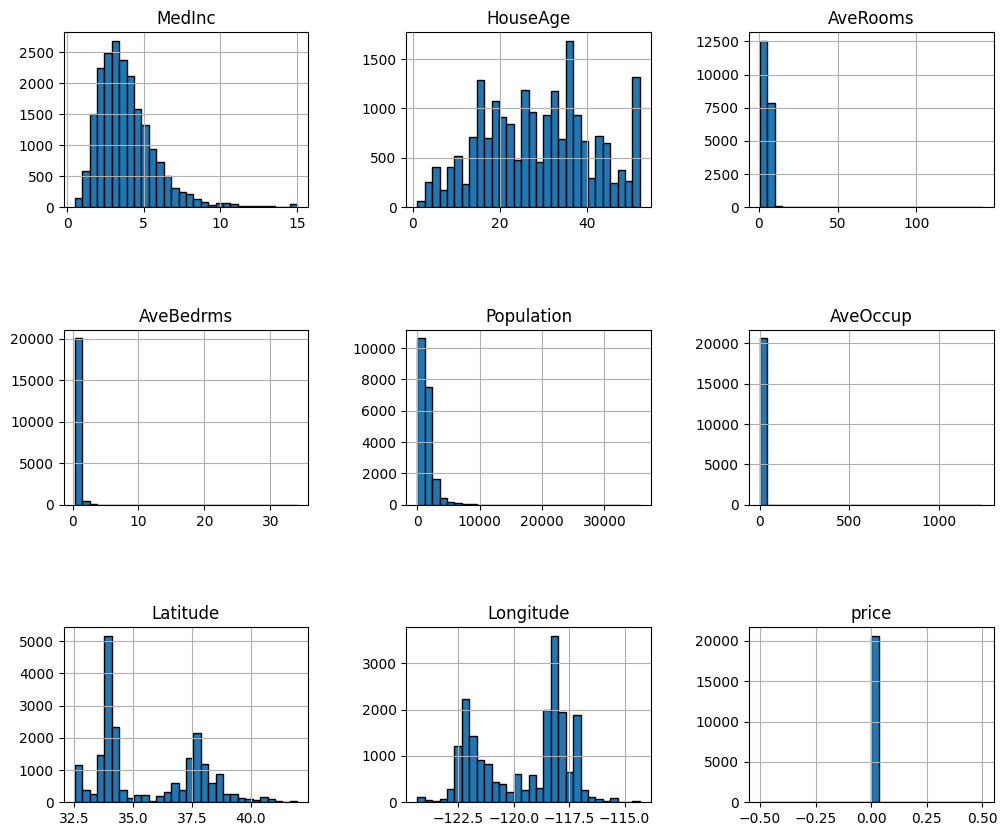

In [24]:
housing_df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

<h3 style="background-color:yellow"> Task: </h3>

Let's have a closer look at our regression target that we added under the `PRICE` column. Edit the code above to show only one graph and add the x and y labels accordingly from the dataset description we look at in the beginning. 


<Axes: >

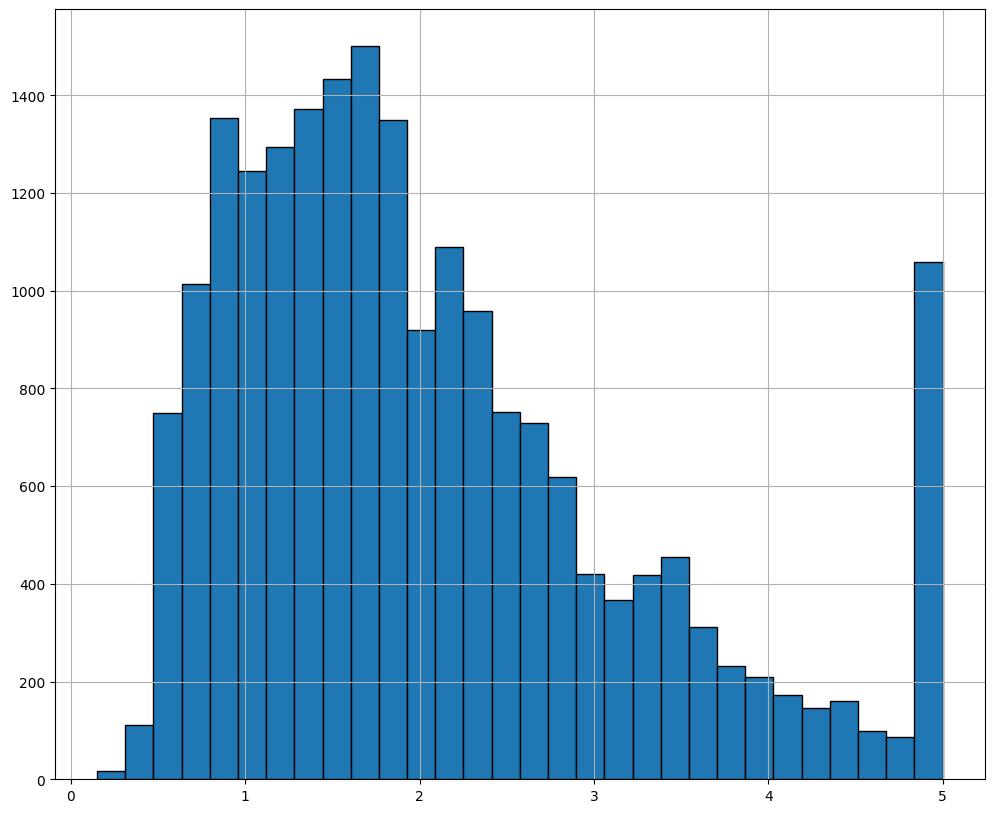

In [46]:
# write your code here 
housing_df['price'].hist(figsize=(12, 10), bins=30, edgecolor="black")

We can see from the plot that the values of PRICE are distributed normally with few outliers. This is to be expected from our housing dataset, but is not necessarily the case each time.

<h3 style="background-color:yellow"> Task: </h3>
    
- Create a correlation matrix that measures the linear relationships between the variables.
- Try to generate this with the price column included

<span style="color:green"> <strong> Hint: </strong> The correlation matrix can be formed by using the `corr` function from the `pandas` dataframe library. Use the `heatmap` function from the `seaborn` library to plot the correlation matrix. </span>

<Axes: >

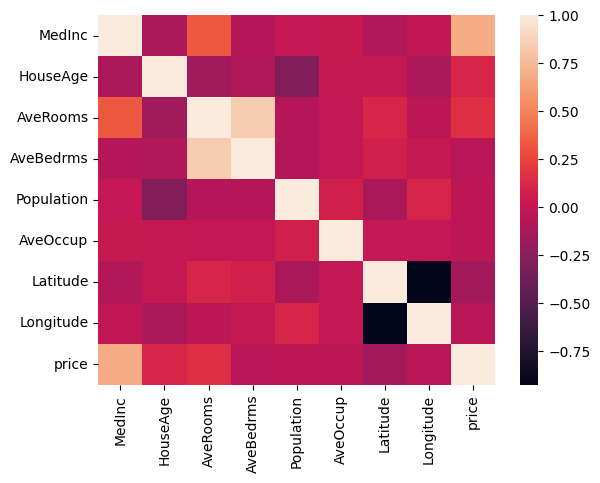

In [48]:
corr = housing_df.corr()
sns.heatmap(corr)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

Notice

1. By looking at the correlation matrix we can see `MedInc` (the median income on the block) has a strong positive correlation with PRICE (0.69) whereas Latitude has a high negative correlation with PRICE (-0.14)
2. An important point in selecting features for a linear regression model is to check for multicolinearity. The features `AveRooms`, `AveBedrms` have a correlation of 0.85. These feature pairs are strongly correlated to each other. This can affect the model. 

But for now we will keep all the features.


<h3 style="background-color:yellow"> Task: </h3>
Let's have a better look at the data: 

- Create plots showing how the house price changes with the average number of rooms. 
- Experiment with other features and see if you can learn anything about the data

In [ ]:
# write your code here 

<h3 style="background-color:yellow"> Task: </h3>
Let's create another scatterplot to see the relation of the data better

- Create a plot where the x axis is the average number of rooms and the y axis is the median income. Use colors to annotate Median house values 


<span style="color:green"> <strong> Hint: </strong> Use the `hue` and `palette` features of the `seaborn scatterplot` function. https://seaborn.pydata.org/generated/seaborn.scatterplot.html </span>

In [ ]:
# write your code here 

## Predicting House Prices with one feature


Since it is really hard to visualise with the multiple features, we will first predict the house price with just one vaiable and then move to the regression with all features.

Since we saw that 'MedInc' shows positive correlation with the House Prices we will use this variable


<h3 style="background-color:yellow"> Task: </h3>

- Define `X_income` and `y_price` variables and get their values from the `housing_df` columns 
- Place the contents of the above variables into numpy arrays. Since we are using a single feature consisting of only one column, we need to reshape the arrays <strong> Hint:  Use `.reshape(-1,1)` </strong>
- Print the shape of the variables for a sanity check, they should be the same

In [ ]:
# write your code here 

### Splitting the data into training and testing sets

Since we need to test our model, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data.

<h3 style="background-color:yellow"> Task: </h3>

To split the data we use `train_test_split` function provided by `scikit-learn` library. 

- Split the data with the above function where the test size is 20% of the data.
- Finally, print the shapes of our training and test set to verify if the splitting has occurred properly.
    

<span style="color:green"> <strong> Hint: </strong> Documentation for `train_test_split`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# write your code here 

In [ ]:
# write your code here 

### Training and testing the model

Here we use scikit-learn’s LinearRegression to train our model on both the training and check it on the test sets

In [ ]:
reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

Now we will evaluate the model on the training set

In [ ]:
# model evaluation for training set

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")
    

<h3 style="background-color:yellow"> Task: </h3>

- Modify the above code to evaluate the test set

In [ ]:
# write your code here 

#### Visualization 

In [ ]:
prediction_space = np.linspace(min(X_income), max(X_income)).reshape(-1,1) 
plt.scatter(X_income,y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('Median Income')
plt.show()

## Regression Model for All the variables

Now we will create a model considering all the features in the dataset. The process is almost the same and also the evaluation model but in this case the visualization will not be possible in a 2D space.

<h3 style="background-color:yellow"> Task: </h3>

- Create `X` and `y` same as before, but this time X is not only the median income, but rather all the columns of the dataframe
- Follow the same steps as in 1.4 to split the data into training and test sets 
- Create and fit a linear regression model on the data 
- Run a model evaluation on the train and test sets 

In [ ]:
# Define X and y here 

In [ ]:
# Split the dataset 

In [ ]:
# Define and fit the model

In [ ]:
# model evaluation for training set
# write your code here 

In [ ]:
# model evaluation for test set
# write your code here 

## Summary

By engaging with this notebook, you will:
- Use the scikit-library to load a dataset and train a regression model
- 
- Learn how to analyze a dataset and inspect different features and their correlation with the regression target
- Create multiple plots and a confusion matrix to better understand the data
- Train a regression model using multiple features
- Evalaute a regression model 

